In [9]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.experimental.algorithms.mocmaes import MO_CMAES
from pymoo.factory import get_reference_directions
from pymoo.optimize import minimize
from pymoo.problems.multi import ZDT1, TNK
from pymoo.visualization.scatter import Scatter
from pysamoo.experimental.ParDen import ParDen

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
gaussian_process = GaussianProcessRegressor()

problem = ZDT1(n_var=10)

ref_dirs = get_reference_directions("das-dennis", 2, n_points=20)

algorithm = NSGA2(pop_size=20, n_offsprings=10, ref_dirs=ref_dirs)

# algorithm = MO_CMAES(mu=20, sigma=0.1, lambda_=10)

algorithm = ParDen(algorithm,
                   n_initial_doe=20,
                   surrogate=gaussian_process, 
                   nondominated_ranks=1,
                   twopoint0=True,
                   look_ahead=True)

res = minimize(
    problem,
    algorithm,
    ('n_evals', 250),
    seed=1,
    verbose=True)

n_gen |  n_eval |     igd      |      gd      |      hv      |    beta0     |  nds_score   |   n_front   
    1 |      20 |  1.911750382 |  2.574224274 |  0.00000E+00 |           -1 |  0.392727935 |            5
    2 |      30 |  1.291787506 |  1.958253122 |  0.00000E+00 |           14 |  0.483102264 |            5
    3 |      40 |  1.210248479 |  1.798351187 |  0.00000E+00 |           19 |  0.484535021 |            6
    4 |      50 |  0.265371032 |  0.897373141 |  0.448206915 |           14 |  0.481160153 |            7
    5 |      60 |  0.146261096 |  0.198105207 |  0.465337526 |           12 |  0.570603118 |           10
    6 |      70 |  0.143005447 |  0.171677445 |  0.467360710 |            5 |  0.399467962 |           12
    7 |      80 |  0.142614753 |  0.158979400 |  0.468120871 |           17 |  0.500026855 |           13
    8 |      90 |  0.120373626 |  0.138335217 |  0.493354284 |           11 |  0.447017927 |           17
    9 |     100 |  0.097589093 |  0.140283700 

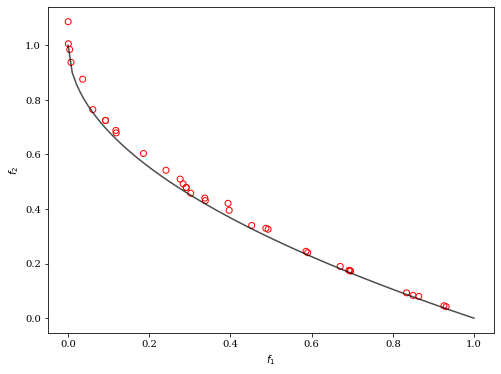

In [10]:
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [11]:
# algorithm.setup(problem, seed=2, termination=('n_evals', 250))

# for k in range(3):
#     algorithm.next()
    # print(algorithm.n_gen)

In [12]:
# res.F